In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv' , usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
def fun(df,var):
    df[var+'_arbitary']=df[var].fillna(99)

In [6]:
fun(df,'Age')

In [7]:
df.isnull().sum()

Survived         0
Age             86
Fare             1
Age_arbitary     0
dtype: int64

In [8]:
print('Age varible std = {}'.format (df['Age'].std()))
print('Age Arbitary variable std = {}'.format (df['Age_arbitary'].std()))

Age varible std = 14.18120923562442
Age Arbitary variable std = 30.550810701683147


In [9]:
print('Age varible std = {}'.format (df['Age'].var()))
print('Age Arbitary variable std = {}'.format (df['Age_arbitary'].var()))

Age varible std = 201.10669538455937
Age Arbitary variable std = 933.3520345300775


In [10]:
df.cov()

,Survived,Age,Fare,Age_arbitary
Survived,0.231960,-0.000088,5.159417,-1.033902
Age,-0.000088,201.106695,291.838610,201.106695
Fare,5.159417,291.838610,3125.657074,-61.712738
Age_arbitary,-1.033902,201.106695,-61.712738,933.352035


<AxesSubplot:>

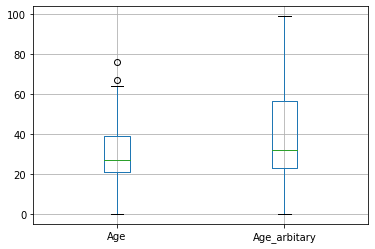

In [11]:
df[['Age' , 'Age_arbitary']].boxplot()

# Graphical Represention

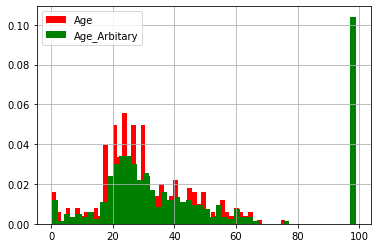

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['Age'].hist(bins=50,color='r',density=True,ax=ax,label='Age')
df['Age_arbitary'].hist(bins=50,color='g',density=True,ax=ax,label='Age_Arbitary')
plt.legend(loc=0)
plt.show()

# Distribution

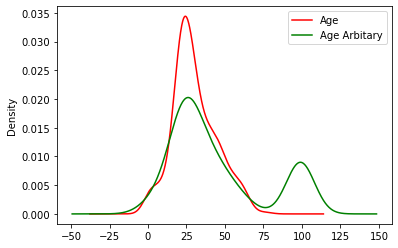

In [15]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
df['Age_arbitary'].plot(kind='kde',color='g',ax=ax,label='Age Arbitary')
plt.legend(loc=0)
plt.show()

# With Sklearn

In [17]:
df=pd.read_csv('titanic.csv' , usecols=['Age','Fare','Survived'])

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
reg=SimpleImputer(strategy='constant',fill_value=99)

In [20]:
reg.fit(df)

SimpleImputer(fill_value=99, strategy='constant')

In [21]:
reg.statistics_

array([99., 99., 99.])

In [42]:
a=reg.transform(df)

In [43]:
a.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [45]:
#df.iloc[:,:]=reg.transform(df.iloc[:,:])

In [46]:
#df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [24]:
#data=pd.DataFrame(df,columns=['Age','Fare','Survived'])

In [25]:
#data.head()

,Age,Fare,Survived
0,0.0,34.5,7.8292
1,1.0,47.0,7.0000
2,0.0,62.0,9.6875
3,0.0,27.0,8.6625
4,1.0,22.0,12.2875


In [26]:
#data.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

# With Featute Engine

In [28]:
df=pd.read_csv('titanic.csv' , usecols=['Age','Fare','Survived'])

In [29]:
from feature_engine.imputation import ArbitraryNumberImputer

In [30]:
reg=ArbitraryNumberImputer(arbitrary_number=99)

In [31]:
reg.fit(df)

ArbitraryNumberImputer(arbitrary_number=99)

In [32]:
reg.variables_

['Survived', 'Age', 'Fare']

In [33]:
reg.imputer_dict_

{'Survived': 99, 'Age': 99, 'Fare': 99}

In [34]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [36]:
temp=reg.transform(df)

In [37]:
temp.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [38]:
temp.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64